# Analysis Project: E-Commerce Public Dataset
- **Nama:** Cynthia Nur Azzahra
- **Email:** cynthiazahra26@gmail.com
- **ID Dicoding:** azhrcy

## Defining Business Questions

- What are the best-selling products every year? Are there any products whose trend is declining or increasing?
- How can customers be grouped into spending tiers (low, medium, high) based on transaction amounts?
- From which geographical location do the most orders come from?

## Prepare All Used Packages/Library

In [1]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 91% 39.0M/42.6M [00:01<00:00, 39.2MB/s]
100% 42.6M/42.6M [00:01<00:00, 26.7MB/s]


In [2]:
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [4]:
# Load the datasets
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- xxx
- xxx

### Assessing Data

#### 1. Verify the data type of each column on all tables

In [13]:
print('Customers DataFrame:')
print(customers.info())

print('\Geolocation DataFrame:')
print(geolocation.info())

print('\nItems DataFrame:')
print(order_items.info())

print('\nOrder Payements DataFrame:')
print(order_payments.info())

print('\nReviews DataFrame:')
print(order_reviews.info())

print('\nOrders DataFrame:')
print(orders.info())

print('\nCategory DataFrame:')
print(category.info())

print('\nProducts DataFrame:')
print(products.info())

print('\nSellers DataFrame:')
print(sellers.info())

Customers DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
\Geolocation DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3

#### 2. Missing Values

In [14]:
# Checking for missing values in the customers dataset
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
# Checking for missing values in the geolocation dataset
geolocation.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [16]:
# Checking for missing values in the order_items dataset
order_items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [17]:
# Checking for missing values in the order_payments dataset
order_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [18]:
# Checking for missing values in the order_reviews dataset
order_reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [19]:
# Checking for missing values in the orders dataset
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [20]:
# Checking for missing values in the category dataset
category.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [21]:
# Checking for missing values in the products dataset
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [22]:
# Checking for missing values in the sellers dataset
sellers.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


#### 3. Duplicate Data

In [23]:
# checking duplicate data
customer_duplicate_count = customers.duplicated().sum()
customer_total_count = len(customers)

geolocation_duplicate_count = geolocation.duplicated().sum()
geolocation_total_count = len(geolocation)

item_duplicate_count = order_items.duplicated().sum()
item_total_count = len(order_items)

payment_duplicate_count = order_payments.duplicated().sum()
payment_total_count = len(order_payments)

reviews_duplicate_count = order_reviews.duplicated().sum()
reviews_total_count = len(order_reviews)

order_duplicate_count = orders.duplicated().sum()
order_total_count = len(orders)

category_duplicate_count = category.duplicated().sum()
category_total_count = len(category)

product_duplicate_count = products.duplicated().sum()
product_total_count = len(products)

seller_duplicate_count = sellers.duplicated().sum()
seller_total_count = len(sellers)

# Create a DataFrame to store the calculation results
duplicate_counts_df = pd.DataFrame({
    'Total Sample Count': [customer_total_count, geolocation_total_count, item_total_count, payment_total_count, reviews_total_count, order_total_count, category_total_count, product_total_count, seller_total_count],
    'Duplicate Count': [customer_duplicate_count, geolocation_duplicate_count, item_duplicate_count, payment_duplicate_count, reviews_duplicate_count, order_duplicate_count, category_duplicate_count, product_duplicate_count, seller_duplicate_count]
}, index=['customers', 'geolocation', 'items', 'payments', 'reviews', 'orders', 'category', 'products', 'sellers'])

duplicate_counts_df

,Total Sample Count,Duplicate Count
customers,99441,0
geolocation,1000163,261831
items,112650,0
payments,103886,0
reviews,99224,0
orders,99441,0
category,71,0
products,32951,0
sellers,3095,0


### Cleaning Data

#### 1. Cleaning order data

In [24]:
# Filter orders that have been delivered to the customer
delivered_orders = orders[orders['order_delivered_customer_date'].notnull()]

In [25]:
# Drop orders where delivery dates are missing
delivered_orders = delivered_orders.dropna(subset=['order_delivered_customer_date'])

In [26]:
# Filter out orders that were not approved or never shipped
delivered_orders = delivered_orders[delivered_orders['order_status'] == 'delivered']

In [27]:
# Fill missing values in 'order_approved_at' with 'order_purchase_timestamp'
delivered_orders['order_approved_at'].fillna(delivered_orders['order_purchase_timestamp'], inplace=True)

<ipython-input-27-58ed2d742c9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivered_orders['order_approved_at'].fillna(delivered_orders['order_purchase_timestamp'], inplace=True)


In [28]:
# Convert columns to datetime
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])
delivered_orders['order_delivered_carrier_date'] = pd.to_datetime(delivered_orders['order_delivered_carrier_date'])

# Calculate the median shipping time from purchase to carrier date
# Make sure to only calculate where both dates are not null
valid_shipping_times = delivered_orders['order_delivered_carrier_date'] - delivered_orders['order_purchase_timestamp']
median_shipping_time = valid_shipping_times.dropna().median()

# Fill missing 'order_delivered_carrier_date' using median shipping time
delivered_orders['order_delivered_carrier_date'].fillna(delivered_orders['order_purchase_timestamp'] + median_shipping_time, inplace=True)

<ipython-input-28-f2223d729d27>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivered_orders['order_delivered_carrier_date'].fillna(delivered_orders['order_purchase_timestamp'] + median_shipping_time, inplace=True)


In [29]:
# Ensure there are no missing delivery dates for customer
delivered_orders = delivered_orders.dropna(subset=['order_delivered_customer_date'])

In [30]:
# Remove duplicate rows if any
delivered_orders = delivered_orders.drop_duplicates()

#### 2. Cleaning product data

In [31]:
# Delete unnecessary columns
drop_cols = ['product_name_lenght',
             'product_description_lenght',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm',
             'product_photos_qty']

products.drop(drop_cols, axis=1, inplace=True)

In [34]:
# After looking at the list of product categories I assumed to replace Nan with "other"
products['product_category_name'] = products['product_category_name'].fillna('other')
products.fillna({'product_category_name': 'other'}, inplace=True)

#### 3. Cleaning geolocation data

In [35]:
# Remove duplicate data
geolocation.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### 1. Explore Customers

In [36]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
17614,9a8e127ee3d61981f8beea052bb5dc54,bf72abdfce444f60be4ba6b963479c6f,11320,sao vicente,SP
59410,f530cd146d415bcd0315b147bb8774f6,fcd67dd409ba74d97fe970e4e0ba189d,20271,rio de janeiro,RJ
31720,c7dfe8a4d98f2c191a73944ffcaa76cc,4f51543860db95f9b98c1ce29a000d68,89550,rio das antas,SC
24614,b34dffef04a2e8ecce637601e7733dfd,1837c1fae016f1f0aedaae13fe6c24e5,69925,senador guiomard,AC
6287,f7a7fde12caac6edfac4282c4675b4ad,fb70db26464e394fbb1183c5d5c36218,35930,joao monlevade,MG


In [37]:
customers.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
...,...
58421,1
58411,1
58398,1


In [38]:
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


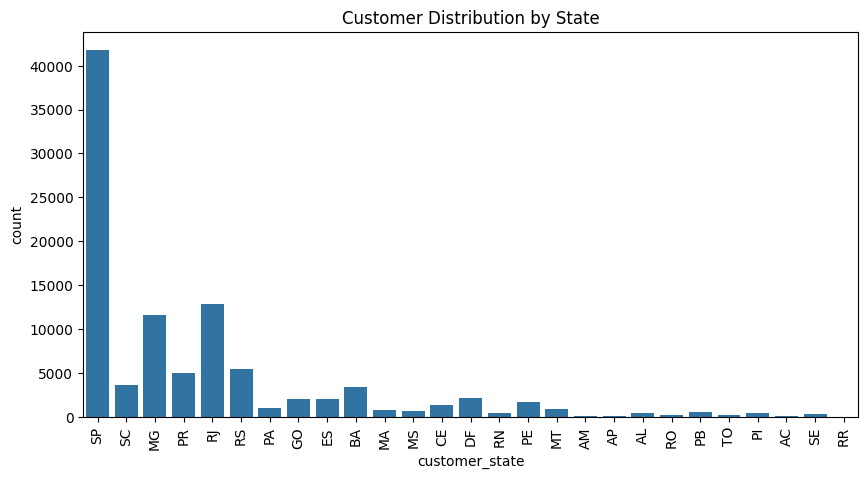

In [39]:
# Check distribution of customer unique IDs
customers['customer_id'].nunique()

# Visualize customers' distribution based on state
plt.figure(figsize=(10, 5))
sns.countplot(x='customer_state', data=customers)
plt.title('Customer Distribution by State')
plt.xticks(rotation=90)
plt.show()

### 2. Explore Orders

In [40]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3550,efc21a26212414ea2383d5392f15f231,b88110cc956e2c4f3ed611c4a64b297f,delivered,2018-04-11 10:45:45,2018-04-12 10:51:58,2018-04-12 21:46:27,2018-04-16 19:58:25,2018-04-27 00:00:00
84708,51b49289046dde9892d02a06418f6b89,723a5aaedfd28127b7f4bf4ead493c51,delivered,2018-03-06 13:15:48,2018-03-07 02:35:29,2018-03-07 20:59:14,2018-03-17 14:52:18,2018-04-11 00:00:00
84818,98464a5096e400810b94bb93f38924c9,24301c6ce48874a51221d4e5584a7885,canceled,2018-07-12 12:01:37,2018-07-12 12:15:29,NaN,NaN,2018-08-07 00:00:00
25211,1b988e4cc28ec72241d86331f6edb974,c13053da85854545a5a7f5c2d19976f8,delivered,2017-09-24 16:23:54,2017-09-24 16:35:09,2017-09-26 20:03:37,2017-10-05 15:38:23,2017-10-24 00:00:00
45398,ec9dc57817baa3a581380d5940fda322,7859b226e8b99e2263fae3c8fef443b2,delivered,2018-03-28 08:03:14,2018-03-29 03:15:37,2018-04-05 01:32:09,2018-04-11 16:51:34,2018-04-26 00:00:00


In [41]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders.groupby(orders['order_purchase_timestamp'].dt.year)['customer_id'].nunique().sort_values(ascending=False)

,customer_id
order_purchase_timestamp,
2018,54011
2017,45101
2016,329


In [42]:
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], errors='coerce')
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], errors='coerce')

delivery_time = orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]

delivery_time = delivery_time.apply(lambda x: x.total_seconds() if pd.notnull(x) else None)

orders["delivery_time"] = round(delivery_time / 86400, 2)

<Axes: >

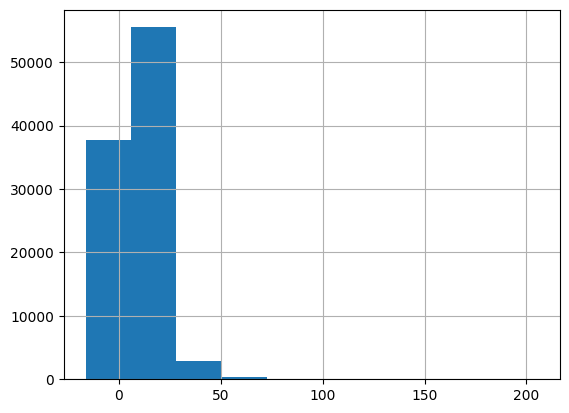

In [43]:
orders.delivery_time.hist()

### 3. Explore Orders & Customers

In [44]:
customer_id_in_orders_df =  orders.customer_id.tolist()
customers["status"] = customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
92868,3404fbd3964c5abd6fe76ae239b0bd29,5373d3bd71b05d85cc1b76a125943527,89760,ita,SC,Active
5383,fe2626b9e5199ee9e77b01eadb8ef822,d3efdecc47d13cd2948acb4f061eca57,7130,guarulhos,SP,Active
92870,038d099e202deff2c5ac1e89f86c6f46,934413f76823331fd8c6d6d9958f0631,4279,sao paulo,SP,Active
92029,216564348ba1ceaffb29b28e9a105ebd,60c0433b6904c6dfe413dafeb2c95de0,89899,ipora do oeste,SC,Active
9991,37b1637fce7efc4438e4e9345d781600,8c8599d9df59347ee1ff99500b68bd94,61905,maracanau,CE,Active


In [45]:
customers.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


In [46]:
orders_customers = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,13.81
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,3.14
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,0.70
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,10.24


In [47]:
orders_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [48]:
orders_customers.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [49]:
orders_customers.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### 4. Explore Payments & Review

In [50]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
11033,d3dbb7cf981cc1ab19fbe5e22afbfcf9,1,credit_card,3,31.28
102548,0306b467a7c7d400d265b71cf6608e15,1,boleto,1,75.08
39729,7b394ed40ae60bd168cb4f5d18b891ee,1,boleto,1,77.82
69839,665c6b8e3c77888e2a0c9b64ad905155,1,debit_card,1,168.95
85415,4689b1816de42507a7d63a4617383c59,13,voucher,1,14.10


In [51]:
payment_review = pd.merge(
    left=order_payments,
    right=order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39


In [52]:
payment_review.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [53]:
payment_review.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

,order_id
payment_value,
50.00,293
77.57,250
100.00,249
35.00,165
73.34,160
...,...
222.07,1
222.09,1
222.11,1


In [54]:
payment_review.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### 5. Customers Order & Payment Review

In [55]:
customers_df = pd.merge(
    left=orders_customers,
    right=payment_review,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


### 5. Explore Order Item & Sellers

In [56]:
item_sellers = pd.merge(
    left=order_items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [57]:
item_sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


In [58]:
item_sellers.groupby("order_item_id").agg({
    "order_id": "nunique",
    "price": ["min", "max"],
    "freight_value": ["min", "max"]
}).reset_index()

order_item_id order_id price          freight_value        
                  nunique   min      max           min     max
0              1    98666  0.85  6735.00          0.00  409.68
1              2     9803  0.85  2299.95          0.00  299.16
2              3     2287  1.20  1790.00          0.00  299.16
3              4      965  1.20  1790.00          0.00  299.16
4              5      460  1.20  1680.00          0.00  299.16
5              6      256  1.20  1680.00          0.03  299.16
6              7       58  1.20  1680.00          0.14   88.57
7              8       36  1.20  1680.00          0.15   88.57
8              9       28  1.20   284.99          0.14   88.57
9             10       25  1.20   284.99          0.08   40.69
10            11       17  1.20   179.99          1.20   76.50
11            12       13  1.20   108.00          1.20   24.02
12            13        8  1.20   100.00          1.20   16.22
13            14        7  1.20   100.00          1.20   16.22
14            15        5  1.20   100.00          1.20   16.22
15            16        3  1.20   100.00          7.89   14.44
16            17        3  1.20   100.00          7.89   14.44
17            18        3  1.20   100.00          7.89   14.44
18            19        3  1.20   100.00          7.89   14.44
19            20        3  1.20   100.00          7.89   14.44
20            21        1  7.80     7.80          6.57    6.57

### 6. Explore Products & Category

In [59]:
cat_product = pd.merge(
    left=products,
    right=category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
cat_product.head()

,product_id,product_category_name,product_weight_g,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,housewares


In [60]:
cat_product.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [61]:
cat_product.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### Item Seller & Product

In [62]:
seller_products = pd.merge(
    left=products,
    right=item_sellers,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_products.head()

,product_id,product_category_name,product_weight_g,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


### 7. Explore Geolocation

In [63]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
266555,12040,-23.031819,-45.584122,taubate,SP
267885,12062,-23.004828,-45.551062,taubate,SP
420410,20930,-22.883770,-43.226289,rio de janeiro,RJ
306447,13490,-22.487120,-47.458651,cordeiropolis,SP
238296,9726,-23.689904,-46.562955,sao bernardo do campo,SP


In [64]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [65]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### 8. Explore All Data

In [66]:
all_data = pd.merge(
    left=orders_customers,
    right=seller_products,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_category_name,product_weight_g,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,moveis_escritorio,8683.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,utilidades_domesticas,10150.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,moveis_escritorio,8267.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,moveis_escritorio,12160.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,casa_conforto,5200.0,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [67]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113425 non-null  object        
 1   customer_unique_id             113425 non-null  object        
 2   customer_zip_code_prefix       113425 non-null  int64         
 3   customer_city                  113425 non-null  object        
 4   customer_state                 113425 non-null  object        
 5   status                         113425 non-null  object        
 6   order_id                       113425 non-null  object        
 7   order_status                   113425 non-null  object        
 8   order_purchase_timestamp       113425 non-null  datetime64[ns]
 9   order_approved_at              113264 non-null  object        
 10  order_delivered_carrier_date   111457 non-null  datetime64[ns]
 11  

In [68]:
all_data.groupby(by=["customer_city", "product_category_name"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name                        
abadia dos dourados cool_stuff              199.00          20.63
                    esporte_lazer           120.00          15.59
                    livros_interesse_geral   39.90          18.38
abadiania           eletroportateis         949.99          75.53
abaete              bebes                    65.00          17.70
...                                            ...            ...
ze doca             esporte_lazer           149.90          38.60
                    ferramentas_jardim       39.90          26.61
                    instrumentos_musicais   359.00          49.04
zortea              informatica_acessorios   69.90          20.98
                    other                    29.90          16.79

[25723 rows x 2 columns]

### Convert All Data to CSV

In [69]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### What are the best-selling products every year? Are there any products whose trend is declining or increasing?

In [70]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['year'] = orders['order_purchase_timestamp'].dt.year

# Combine order_items data with orders data to get the year of purchase
order_items_df = pd.merge(order_items, orders[['order_id', 'year']], on='order_id')

# Group by product_id and year, count the number of products sold each year
product_sales = order_items_df.groupby(['product_id', 'year']).agg({
    'order_item_id': 'count'
}).reset_index()

product_sales.rename(columns={'order_item_id': 'sales_count'}, inplace=True)

product_sales = pd.merge(product_sales, products[['product_id', 'product_category_name']], on='product_id')

In [71]:
# Find the best-selling products every year
best_selling_products_per_year = product_sales.loc[product_sales.groupby('year')['sales_count'].idxmax()]

# Show results
print(best_selling_products_per_year[['year', 'product_category_name', 'sales_count']])

       year product_category_name  sales_count
34978  2016            perfumaria           11
22750  2017       cama_mesa_banho          359
25503  2018      moveis_decoracao          413


In [72]:
# Pivot to visualize product sales trends every year
product_sales_pivot = product_sales.pivot_table(index='product_category_name', columns='year', values='sales_count', fill_value=0)

# Calculate percentage change year-over-year
product_sales_pivot['trend'] = product_sales_pivot.pct_change(axis=1).mean(axis=1)

# Products with an uptrend (trend > 0) and a decrease (trend < 0)
increasing_trend = product_sales_pivot[product_sales_pivot['trend'] > 0]
declining_trend = product_sales_pivot[product_sales_pivot['trend'] < 0]

# Show results
print("Products with increasing trends:")
print(increasing_trend.head())
print("\nProducts with a downward trend:")
print(declining_trend.head())

Products with increasing trends:
year                       2016      2017      2018     trend
product_category_name                                        
agro_industria_e_comercio   0.0  2.541667  2.559322       inf
alimentos                   1.0  4.379310  5.787879  1.850476
alimentos_bebidas           0.0  2.339286  2.194030       inf
artes                       0.0  1.708333  4.941176       inf
artes_e_artesanato          0.0  1.000000  1.294118       inf

Products with a downward trend:
year                   2016      2017      2018     trend
product_category_name                                    
climatizacao            2.5  2.166667  2.308824 -0.033861


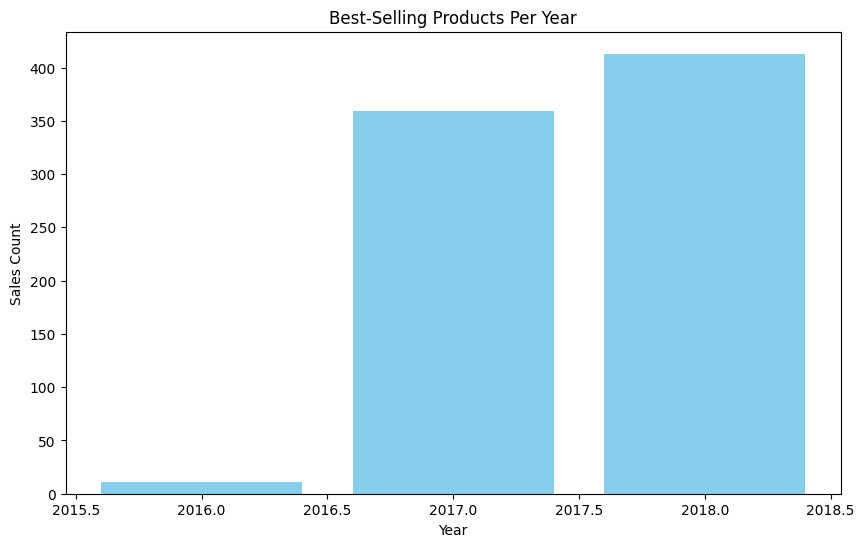

In [73]:
# Plot of the best-selling products every year
plt.figure(figsize=(10,6))
plt.bar(best_selling_products_per_year['year'], best_selling_products_per_year['sales_count'], color='skyblue')
plt.title('Best-Selling Products Per Year')
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.show()

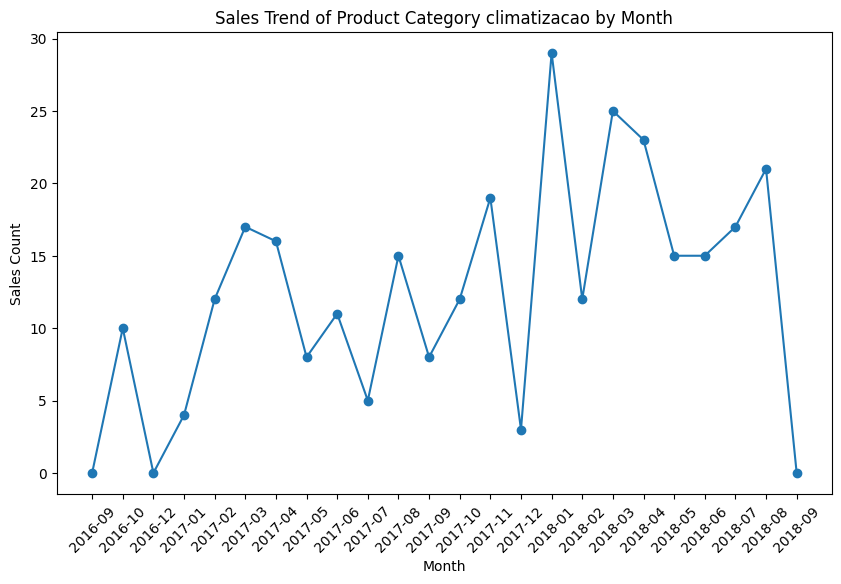

In [74]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Add the 'month' column for monthly analysis purposes
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Combine order_items data with orders to get purchase month information
order_items_df = pd.merge(order_items, orders[['order_id', 'month']], on='order_id')

# Merge with product to get product category names
order_items_df = pd.merge(order_items_df, products[['product_id', 'product_category_name']], on='product_id')

# Group product sales by month and product category
product_sales_monthly = order_items_df.groupby(['product_category_name', 'month']).size().unstack().fillna(0)

# Select the specific product category you want to visualize
example_product_category = 'climatizacao'

# Convert index 'month' from Period to string so matplotlib can handle
product_sales_monthly.columns = product_sales_monthly.columns.astype(str)

# Visualization of product sales trends by month
plt.figure(figsize=(10,6))
plt.plot(product_sales_monthly.columns, product_sales_monthly.loc[example_product_category], marker='o')
plt.title(f'Sales Trend of Product Category {example_product_category} by Month')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()


### How can customers be grouped into spending tiers (low, medium, high) based on transaction amounts, and what behavioral differences are observed across these groups?

In [75]:
# Merge the relevant datasets to get total transaction amount per customer
order_items_payments = pd.merge(order_items, order_payments, on='order_id')
order_items_payments_orders = pd.merge(order_items_payments, orders, on='order_id')

# Group by customer ID to calculate total spending per customer
customer_spending = order_items_payments_orders.groupby('customer_id')['payment_value'].sum().reset_index()
customer_spending.rename(columns={'payment_value': 'total_spending'}, inplace=True)

# Define spending tiers based on quantiles
customer_spending['spending_tier'] = pd.qcut(customer_spending['total_spending'],
                                             q=[0, 0.33, 0.66, 1.0],
                                             labels=['Low Spenders', 'Medium Spenders', 'High Spenders'])

# Summary statistics for each tier
spending_summary = customer_spending.groupby('spending_tier', observed=False).agg({
    'total_spending': ['mean', 'min', 'max', 'sum', 'count']
}).reset_index()

print(spending_summary)

     spending_tier total_spending                                       
                             mean     min        max          sum  count
0     Low Spenders      49.316742    9.59      74.67   1605999.70  32565
1  Medium Spenders     110.753416   74.69     156.73   3605909.73  32558
2    High Spenders     450.069324  156.73  109312.64  15096225.28  33542


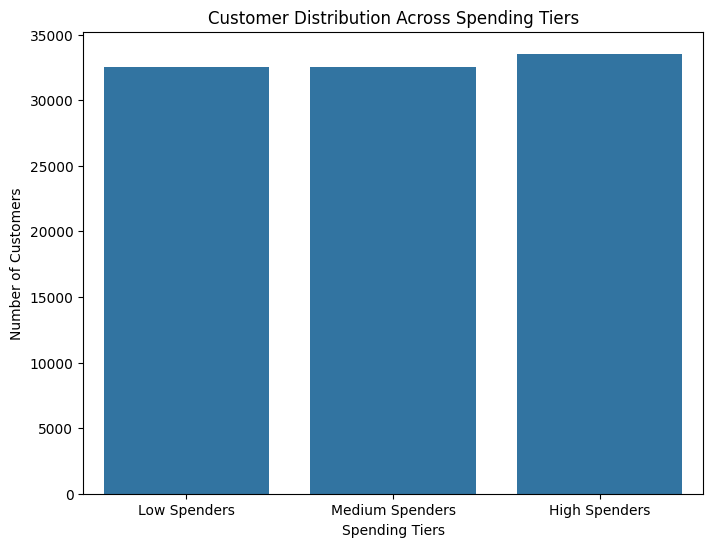

In [81]:
# Plot the distribution of customers in different spending tiers
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_spending, x='spending_tier')
plt.title('Customer Distribution Across Spending Tiers')
plt.xlabel('Spending Tiers')
plt.ylabel('Number of Customers')
plt.show()

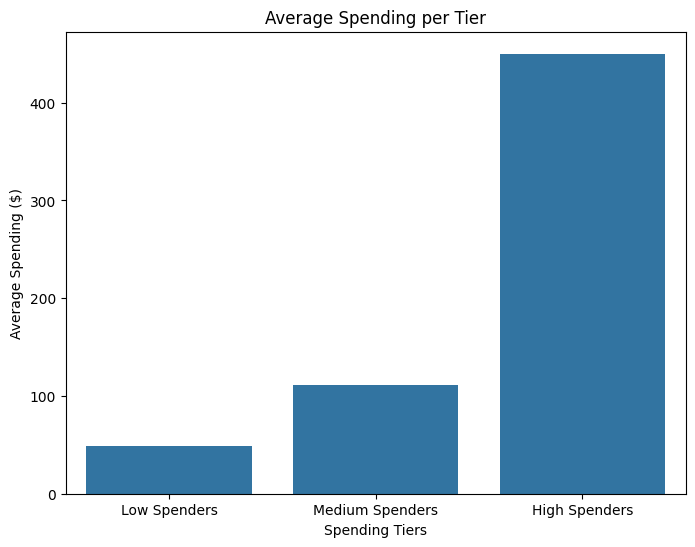

In [82]:
# Bar plot of average spending in each tier
plt.figure(figsize=(8, 6))
sns.barplot(data=spending_summary, x='spending_tier', y=('total_spending', 'mean'))
plt.title('Average Spending per Tier')
plt.xlabel('Spending Tiers')
plt.ylabel('Average Spending ($)')
plt.show()

In [78]:
# Analyze purchasing behavior: Order frequency and average order value
order_frequency = order_items_payments_orders.groupby('customer_id')['order_id'].nunique().reset_index()
order_frequency.rename(columns={'order_id': 'order_count'}, inplace=True)

# Merge order frequency with spending data
customer_behavior = pd.merge(customer_spending, order_frequency, on='customer_id')

# Calculate average order value for each customer
customer_behavior['average_order_value'] = customer_behavior['total_spending'] / customer_behavior['order_count']

# Analyze differences in order count and average order value across tiers
behavior_summary = customer_behavior.groupby('spending_tier', observed=False).agg({
    'order_count': ['mean', 'sum'],
    'average_order_value': ['mean', 'sum']
}).reset_index()

print(behavior_summary)

     spending_tier order_count        average_order_value             
                          mean    sum                mean          sum
0     Low Spenders         1.0  32565           49.316742   1605999.70
1  Medium Spenders         1.0  32558          110.753416   3605909.73
2    High Spenders         1.0  33542          450.069324  15096225.28


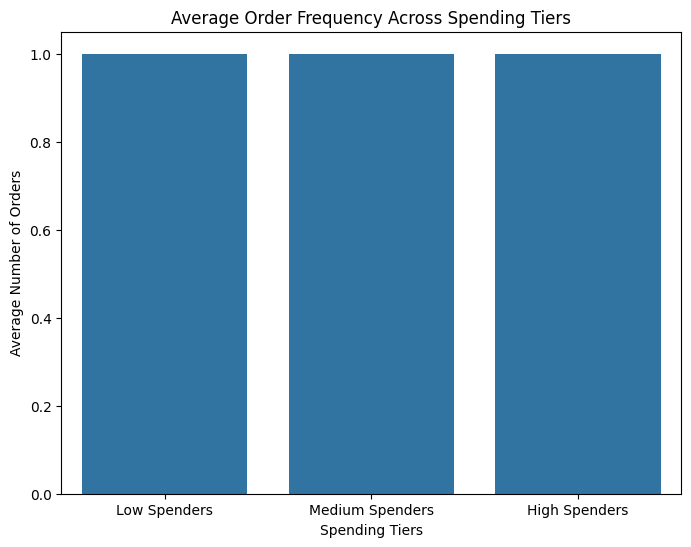

In [83]:
# Plot average order count across spending tiers
plt.figure(figsize=(8, 6))
sns.barplot(data=behavior_summary, x='spending_tier', y=('order_count', 'mean'))
plt.title('Average Order Frequency Across Spending Tiers')
plt.xlabel('Spending Tiers')
plt.ylabel('Average Number of Orders')
plt.show()

### From which geographical location do the most orders come from?

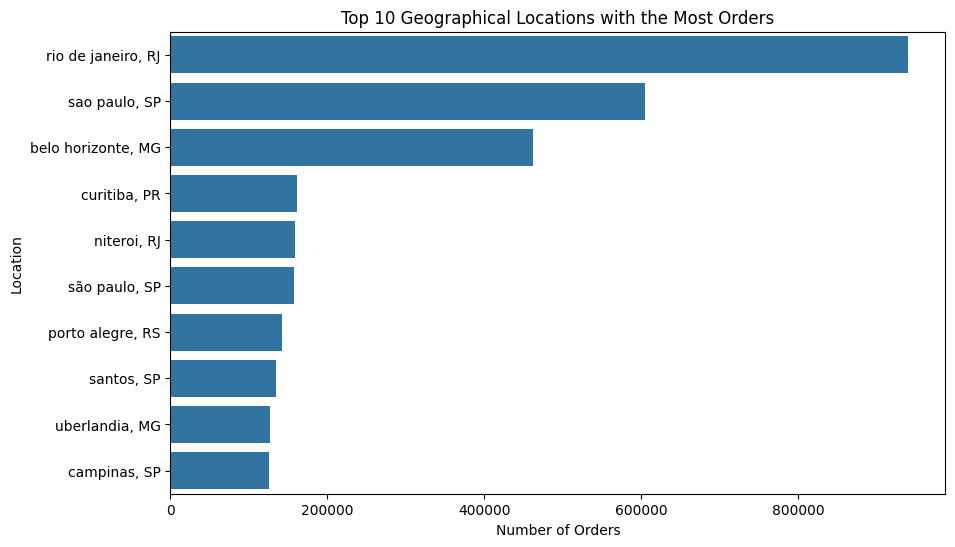

In [80]:
# Convert timestamps to datetime for future analysis
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Merge orders and customers
orders_customers = pd.merge(orders, customers, on='customer_id')

# Merge with geolocation using zip code prefix
orders_geo = pd.merge(orders_customers, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Group by city and state to count the number of orders
orders_by_geo = orders_geo.groupby(['geolocation_city', 'geolocation_state']).size().reset_index(name='order_count')

# Sort by the number of orders to find the top locations
top_locations = orders_by_geo.sort_values(by='order_count', ascending=False).head(10)

# Combine city and state into a single column for clarity in plotting
top_locations['location'] = top_locations['geolocation_city'] + ', ' + top_locations['geolocation_state']

# Visualization using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='order_count', y='location', data=top_locations, dodge=False)
plt.title('Top 10 Geographical Locations with the Most Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Location')
plt.show()

## Conclusion

*   What are the best-selling products every year? Are there any products whose trend is declining or increasing?

> The best-selling categories every year are **Perfumaria**, **Cama Mesa Banho**, and **Móveis Decoração**, indicating consistent customer preference. For specific products like **Climaticazo**, sales fluctuate monthly, with periods of both increase and decline, suggesting seasonal or external factors influence demand.


*   How can customers be grouped into spending tiers (low, medium, high) based on transaction amounts?


> By grouping customers into spending tiers, businesses can better understand customer behavior and target different segments with appropriate strategies, such as offering discounts for low spenders or special rewards for high spenders.


*   From which geographical location do the most orders come from?


> According to the diagram, many orders were made from **Rio de Janeiro**, **Sao Paulo**, **Belo Horizonte** and others.



